In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
customer_df = pd.read_csv('customer.csv')
transactions_df = pd.read_csv('transactions.csv')
income_group_df = pd.read_csv('income_group.csv')
train_df = pd.read_csv('Train.csv')

In [3]:
income_group_df = income_group_df.rename(columns={'income_group_code': 'INCOME_GROUP_CODE', 'income_group_desc': 'INCOME_GROUP_DESC'})

In [4]:
transactions_df = transactions_df.drop('TRANSACTION_REFERENCE', axis=1)

In [5]:
transactions_df = transactions_df.rename(columns={'RECORD_DATE': 'TRANSACTION_RECORD_DATE'})

In [6]:
transactions_df['TRANSACTION_DESCRIPTION'].fillna('NO DESCRIPTION', inplace=True)
transactions_df.head()

,TRANSACTION_DESCRIPTION,CUSTOMER_IDENTIFIER,TRANSACTION_RECORD_DATE,ACCOUNT_TYPE_CODE,ACCOUNT_BALANCE,AMT,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER
0,NO DESCRIPTION,ID_017ba29a4d371608fad8313ff1d46c8bb42ef830ee0...,2022-07-13 00:00:00+02:00,9317537c2329262b5e19d3e29d23422558e519ca8ff0a8...,1857.56,1000.00,11785,SAVE,internet,89fe98c0e6ccddcf9a0368507f02773693e01dfeb6911c...
1,NO DESCRIPTION,ID_017ba29a4d371608fad8313ff1d46c8bb42ef830ee0...,2022-02-26 00:00:00+02:00,9317537c2329262b5e19d3e29d23422558e519ca8ff0a8...,8843.46,-2000.00,11348,SAVE,internet,89fe98c0e6ccddcf9a0368507f02773693e01dfeb6911c...
2,POS PURCHASE,ID_017ba29a4d371608fad8313ff1d46c8bb42ef830ee0...,2022-07-26 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,23.82,-199.98,148,CHEQ,system,89fe98c0e6ccddcf9a0368507f02773693e01dfeb6911c...
3,NO DESCRIPTION,ID_017ba29a4d371608fad8313ff1d46c8bb42ef830ee0...,2022-03-27 00:00:00+02:00,9317537c2329262b5e19d3e29d23422558e519ca8ff0a8...,198.11,-79.39,11419,SAVE,system,89fe98c0e6ccddcf9a0368507f02773693e01dfeb6911c...
4,NO DESCRIPTION,ID_017ba29a4d371608fad8313ff1d46c8bb42ef830ee0...,2022-05-06 00:00:00+02:00,9317537c2329262b5e19d3e29d23422558e519ca8ff0a8...,13631.60,-200.00,11528,SAVE,atm,89fe98c0e6ccddcf9a0368507f02773693e01dfeb6911c...


In [8]:

# Merge transactions_summary with customer_df on CUSTOMER_IDENTIFIER
customer_df = customer_df.merge(transactions_df, on='CUSTOMER_IDENTIFIER', how='left')

In [10]:
# Merge customer_df with income_group_df on INCOME_GROUP_CODE to include income group information
customer_df = customer_df.merge(income_group_df, on='INCOME_GROUP_CODE', how='left')
customer_df = customer_df.merge(train_df, on = 'CUSTOMER_IDENTIFIER', how='left')

In [11]:
customer_df.shape

(847544, 19)

In [12]:
customer_df.dropna(subset=['RECORD_DATE', 'DECLARED_NET_INCOME'], inplace=True)

In [13]:
customer_df.head()

,CUSTOMER_IDENTIFIER,DATE_LAST_UPDATED,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,TRANSACTION_DESCRIPTION,TRANSACTION_RECORD_DATE,ACCOUNT_TYPE_CODE,ACCOUNT_BALANCE,AMT,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,INCOME_GROUP_DESC,RECORD_DATE,DECLARED_NET_INCOME
0,ID_00a7d65f82a6819e79c29a84e805777f0265308b655...,2022-09,1,6,4,7,51,CASH ACCEPTOR DEP,2022-08-31 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,100.00,100.00,24,CHEQ,atm,678bf23c221a8e747af3a6003c80d496649c5cdc1e1fc0...,"R4,000 - 4,999",2022-08,"7,000"
1,ID_00a7d65f82a6819e79c29a84e805777f0265308b655...,2022-09,1,6,4,7,51,ATM WITHDRAWAL,2022-08-31 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,50.00,-50.00,25,CHEQ,atm,678bf23c221a8e747af3a6003c80d496649c5cdc1e1fc0...,"R4,000 - 4,999",2022-08,"7,000"
2,ID_09651edcac6c55a5e401062b0c0ef7bbba3f3e49538...,2022-09,0,7,10,3,32,NO DESCRIPTION,2022-04-29 00:00:00+02:00,e17913461e7c03cd0f2c1ac41584dcd801cb32e7f86ad9...,5511.00,5503.62,1020,SAVE,teller,00c6c13e3a65de8a170c6d8a16412e6f6bd6be5d708251...,"R5,000 - 5,999",2022-08,"7,300"
3,ID_09651edcac6c55a5e401062b0c0ef7bbba3f3e49538...,2022-09,0,7,10,3,32,NO DESCRIPTION,2022-05-05 00:00:00+02:00,e17913461e7c03cd0f2c1ac41584dcd801cb32e7f86ad9...,903.17,-540.00,1059,SAVE,system,00c6c13e3a65de8a170c6d8a16412e6f6bd6be5d708251...,"R5,000 - 5,999",2022-08,"7,300"
4,ID_09651edcac6c55a5e401062b0c0ef7bbba3f3e49538...,2022-09,0,7,10,3,32,ATM WITHDRAWAL,2022-08-30 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,6655.01,-500.00,125,CHEQ,atm,00c6c13e3a65de8a170c6d8a16412e6f6bd6be5d708251...,"R5,000 - 5,999",2022-08,"7,300"


In [14]:
customer_df['DATE_LAST_UPDATED'] = pd.to_datetime(customer_df['DATE_LAST_UPDATED'])
customer_df['TRANSACTION_RECORD_DATE'] = pd.to_datetime(customer_df['TRANSACTION_RECORD_DATE'])
customer_df['RECORD_DATE'] = pd.to_datetime(customer_df['RECORD_DATE'])

In [15]:
# Split RECORD_DATE into month, day, and year columns
customer_df['Month'] = customer_df['RECORD_DATE'].dt.month
customer_df['Day'] = customer_df['RECORD_DATE'].dt.day
customer_df['Year'] = customer_df['RECORD_DATE'].dt.year

In [16]:
customer_df = customer_df.drop(['RECORD_DATE','TRANSACTION_RECORD_DATE', 'DATE_LAST_UPDATED'], axis=1)

In [17]:
customer_df.duplicated().sum()

4

In [18]:
#removing duplicates
customer_df = customer_df.drop_duplicates()

In [19]:
customer_df.isna().sum()

CUSTOMER_IDENTIFIER         0
SEX_CODE                    0
INCOME_GROUP_CODE           0
NUMBER_OF_ACCOUNTS          0
OCCUPATIONAL_STATUS_CODE    0
AGE                         0
TRANSACTION_DESCRIPTION     0
ACCOUNT_TYPE_CODE           0
ACCOUNT_BALANCE             0
AMT                         0
EVENT_NUMBER                0
PRODUCT_CODE                0
CHANNEL                     0
ACCOUNT_NUMBER              0
INCOME_GROUP_DESC           0
DECLARED_NET_INCOME         0
Month                       0
Day                         0
Year                        0
dtype: int64

In [20]:
customer_df['Day'] = customer_df['Day'].astype(int)
customer_df['Month'] = customer_df['Month'].astype(int)
customer_df['Year'] = customer_df['Year'].astype(int)

In [21]:
customer_df = customer_df.replace({'PRODUCT_CODE' : { 'CHEQ' : 0, 'SAVE' : 2}})
customer_df.head()

,CUSTOMER_IDENTIFIER,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,TRANSACTION_DESCRIPTION,ACCOUNT_TYPE_CODE,ACCOUNT_BALANCE,AMT,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,INCOME_GROUP_DESC,DECLARED_NET_INCOME,Month,Day,Year
0,ID_00a7d65f82a6819e79c29a84e805777f0265308b655...,1,6,4,7,51,CASH ACCEPTOR DEP,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,100.00,100.00,24,0,atm,678bf23c221a8e747af3a6003c80d496649c5cdc1e1fc0...,"R4,000 - 4,999","7,000",8,1,2022
1,ID_00a7d65f82a6819e79c29a84e805777f0265308b655...,1,6,4,7,51,ATM WITHDRAWAL,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,50.00,-50.00,25,0,atm,678bf23c221a8e747af3a6003c80d496649c5cdc1e1fc0...,"R4,000 - 4,999","7,000",8,1,2022
2,ID_09651edcac6c55a5e401062b0c0ef7bbba3f3e49538...,0,7,10,3,32,NO DESCRIPTION,e17913461e7c03cd0f2c1ac41584dcd801cb32e7f86ad9...,5511.00,5503.62,1020,2,teller,00c6c13e3a65de8a170c6d8a16412e6f6bd6be5d708251...,"R5,000 - 5,999","7,300",8,1,2022
3,ID_09651edcac6c55a5e401062b0c0ef7bbba3f3e49538...,0,7,10,3,32,NO DESCRIPTION,e17913461e7c03cd0f2c1ac41584dcd801cb32e7f86ad9...,903.17,-540.00,1059,2,system,00c6c13e3a65de8a170c6d8a16412e6f6bd6be5d708251...,"R5,000 - 5,999","7,300",8,1,2022
4,ID_09651edcac6c55a5e401062b0c0ef7bbba3f3e49538...,0,7,10,3,32,ATM WITHDRAWAL,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,6655.01,-500.00,125,0,atm,00c6c13e3a65de8a170c6d8a16412e6f6bd6be5d708251...,"R5,000 - 5,999","7,300",8,1,2022


In [22]:
customer_df = customer_df.replace({'CHANNEL' : { 'system' : 0, 'atm' : 2, 'internet' : 3, 'teller' : 4}})
customer_df.head()

,CUSTOMER_IDENTIFIER,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,TRANSACTION_DESCRIPTION,ACCOUNT_TYPE_CODE,ACCOUNT_BALANCE,AMT,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,INCOME_GROUP_DESC,DECLARED_NET_INCOME,Month,Day,Year
0,ID_00a7d65f82a6819e79c29a84e805777f0265308b655...,1,6,4,7,51,CASH ACCEPTOR DEP,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,100.00,100.00,24,0,2,678bf23c221a8e747af3a6003c80d496649c5cdc1e1fc0...,"R4,000 - 4,999","7,000",8,1,2022
1,ID_00a7d65f82a6819e79c29a84e805777f0265308b655...,1,6,4,7,51,ATM WITHDRAWAL,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,50.00,-50.00,25,0,2,678bf23c221a8e747af3a6003c80d496649c5cdc1e1fc0...,"R4,000 - 4,999","7,000",8,1,2022
2,ID_09651edcac6c55a5e401062b0c0ef7bbba3f3e49538...,0,7,10,3,32,NO DESCRIPTION,e17913461e7c03cd0f2c1ac41584dcd801cb32e7f86ad9...,5511.00,5503.62,1020,2,4,00c6c13e3a65de8a170c6d8a16412e6f6bd6be5d708251...,"R5,000 - 5,999","7,300",8,1,2022
3,ID_09651edcac6c55a5e401062b0c0ef7bbba3f3e49538...,0,7,10,3,32,NO DESCRIPTION,e17913461e7c03cd0f2c1ac41584dcd801cb32e7f86ad9...,903.17,-540.00,1059,2,0,00c6c13e3a65de8a170c6d8a16412e6f6bd6be5d708251...,"R5,000 - 5,999","7,300",8,1,2022
4,ID_09651edcac6c55a5e401062b0c0ef7bbba3f3e49538...,0,7,10,3,32,ATM WITHDRAWAL,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,6655.01,-500.00,125,0,2,00c6c13e3a65de8a170c6d8a16412e6f6bd6be5d708251...,"R5,000 - 5,999","7,300",8,1,2022


In [23]:
customer_df = customer_df.drop('INCOME_GROUP_DESC', axis=1)

## Encoding

In [24]:

columns_to_encode = ['TRANSACTION_DESCRIPTION', 'CUSTOMER_IDENTIFIER', 'ACCOUNT_TYPE_CODE', 'ACCOUNT_NUMBER']

# Create the LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each column in the list and encode the values
for col in columns_to_encode:
    customer_df[col] = label_encoder.fit_transform(customer_df[col])

# Display the updated DataFrame
customer_df.head()


,CUSTOMER_IDENTIFIER,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,TRANSACTION_DESCRIPTION,ACCOUNT_TYPE_CODE,ACCOUNT_BALANCE,AMT,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,DECLARED_NET_INCOME,Month,Day,Year
0,11,1,6,4,7,51,24,14,100.00,100.00,24,0,2,1535,"7,000",8,1,2022
1,11,1,6,4,7,51,15,14,50.00,-50.00,25,0,2,1535,"7,000",8,1,2022
2,132,0,7,10,3,32,86,13,5511.00,5503.62,1020,2,4,7,"7,300",8,1,2022
3,132,0,7,10,3,32,86,13,903.17,-540.00,1059,2,0,7,"7,300",8,1,2022
4,132,0,7,10,3,32,15,14,6655.01,-500.00,125,0,2,7,"7,300",8,1,2022


In [25]:
customer_df.duplicated().sum()

0

In [26]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595641 entries, 0 to 847543
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CUSTOMER_IDENTIFIER       595641 non-null  int64  
 1   SEX_CODE                  595641 non-null  int64  
 2   INCOME_GROUP_CODE         595641 non-null  int64  
 3   NUMBER_OF_ACCOUNTS        595641 non-null  int64  
 4   OCCUPATIONAL_STATUS_CODE  595641 non-null  int64  
 5   AGE                       595641 non-null  int64  
 6   TRANSACTION_DESCRIPTION   595641 non-null  int64  
 7   ACCOUNT_TYPE_CODE         595641 non-null  int64  
 8   ACCOUNT_BALANCE           595641 non-null  float64
 9   AMT                       595641 non-null  float64
 10  EVENT_NUMBER              595641 non-null  int64  
 11  PRODUCT_CODE              595641 non-null  int64  
 12  CHANNEL                   595641 non-null  int64  
 13  ACCOUNT_NUMBER            595641 non-null  i

In [27]:
customer_df.head()

,CUSTOMER_IDENTIFIER,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,TRANSACTION_DESCRIPTION,ACCOUNT_TYPE_CODE,ACCOUNT_BALANCE,AMT,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,DECLARED_NET_INCOME,Month,Day,Year
0,11,1,6,4,7,51,24,14,100.00,100.00,24,0,2,1535,"7,000",8,1,2022
1,11,1,6,4,7,51,15,14,50.00,-50.00,25,0,2,1535,"7,000",8,1,2022
2,132,0,7,10,3,32,86,13,5511.00,5503.62,1020,2,4,7,"7,300",8,1,2022
3,132,0,7,10,3,32,86,13,903.17,-540.00,1059,2,0,7,"7,300",8,1,2022
4,132,0,7,10,3,32,15,14,6655.01,-500.00,125,0,2,7,"7,300",8,1,2022


In [28]:
customer_df.dropna(inplace=True)

In [29]:
customer_df.isna().sum()

CUSTOMER_IDENTIFIER         0
SEX_CODE                    0
INCOME_GROUP_CODE           0
NUMBER_OF_ACCOUNTS          0
OCCUPATIONAL_STATUS_CODE    0
AGE                         0
TRANSACTION_DESCRIPTION     0
ACCOUNT_TYPE_CODE           0
ACCOUNT_BALANCE             0
AMT                         0
EVENT_NUMBER                0
PRODUCT_CODE                0
CHANNEL                     0
ACCOUNT_NUMBER              0
DECLARED_NET_INCOME         0
Month                       0
Day                         0
Year                        0
dtype: int64

In [30]:
# Remove commas from 'DECLARED_NET_INCOME' column
customer_df['DECLARED_NET_INCOME'] = customer_df['DECLARED_NET_INCOME'].str.replace(',', '')

# Convert 'DECLARED_NET_INCOME' to integers
customer_df['DECLARED_NET_INCOME'] = customer_df['DECLARED_NET_INCOME'].astype(int)


In [31]:
#generates summary statistics
customer_df.describe()

,CUSTOMER_IDENTIFIER,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,TRANSACTION_DESCRIPTION,ACCOUNT_TYPE_CODE,ACCOUNT_BALANCE,AMT,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,DECLARED_NET_INCOME,Month,Day,Year
count,595641.000000,595641.000000,595641.000000,595641.000000,595641.000000,595641.000000,595641.000000,595641.000000,595641.000000,595641.000000,595641.000000,595641.000000,595641.000000,595641.000000,595641.000000,595641.00000,595641.0,595641.0
mean,1804.579497,0.437819,12.224622,10.959786,1.414192,36.068538,73.992684,11.020957,5306.400855,11.878329,6450.080906,0.885376,0.990850,1926.857043,15320.897319,5.64458,1.0,2022.0
std,1039.860904,0.496119,3.843998,4.460490,1.467951,10.382446,31.391661,3.853138,6984.056908,3067.734977,7189.348628,0.993410,1.275555,1119.304254,9053.093464,1.91211,0.0,0.0
min,0.000000,0.000000,0.000000,2.000000,0.000000,16.000000,0.000000,0.000000,-2499.970000,-90000.000000,2.000000,0.000000,0.000000,0.000000,1300.000000,1.00000,1.0,2022.0
25%,890.000000,0.000000,10.000000,8.000000,1.000000,28.000000,61.000000,6.000000,705.410000,-400.000000,1410.000000,0.000000,0.000000,980.000000,8400.000000,4.00000,1.0,2022.0
50%,1819.000000,0.000000,13.000000,10.000000,1.000000,34.000000,86.000000,13.000000,2625.980000,-120.000000,4083.000000,0.000000,0.000000,1910.000000,13700.000000,6.00000,1.0,2022.0
75%,2719.000000,1.000000,15.000000,14.000000,1.000000,43.000000,86.000000,14.000000,7108.990000,-29.000000,9115.000000,2.000000,2.000000,2902.000000,19600.000000,7.00000,1.0,2022.0
max,3599.000000,1.000000,21.000000,38.000000,9.000000,83.000000,122.000000,15.000000,49974.680000,51027.040000,51348.000000,2.000000,4.000000,3894.000000,95600.000000,8.00000,1.0,2022.0


## Checking and removing outliers

<Axes: xlabel='ACCOUNT_BALANCE'>

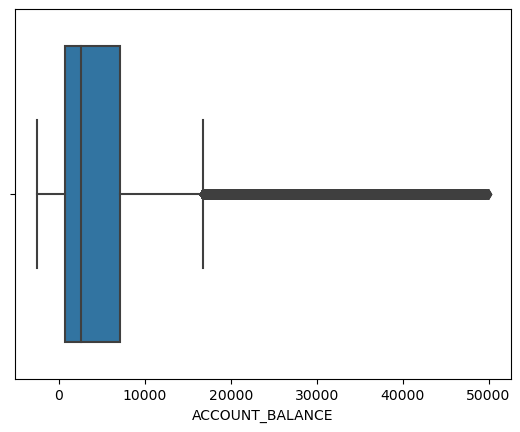

In [32]:
#distribution and outliers
sns.boxplot(x=customer_df['ACCOUNT_BALANCE'])      

<Axes: xlabel='AMT'>

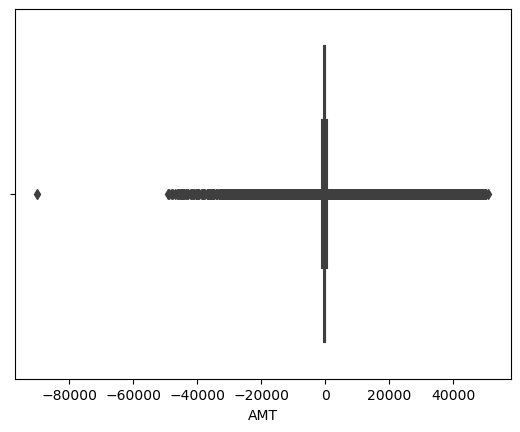

In [33]:
#distribution and outliers
sns.boxplot(x=customer_df['AMT']) 

<Axes: xlabel='EVENT_NUMBER'>

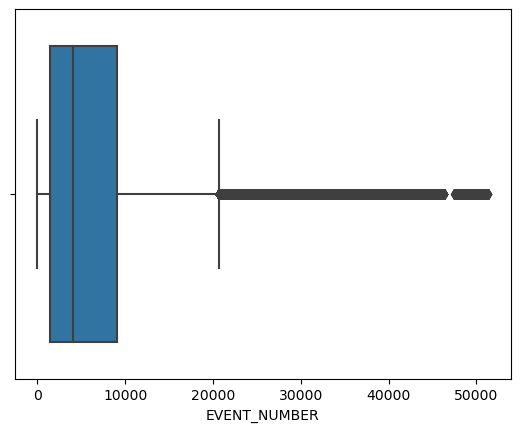

In [34]:
#distribution and outliers
sns.boxplot(x=customer_df['EVENT_NUMBER']) 

In [35]:
customer_df = customer_df[customer_df['EVENT_NUMBER'] <= 45000]
customer_df = customer_df[customer_df['AMT'] >= -80000]

customer_df.head()

,CUSTOMER_IDENTIFIER,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,TRANSACTION_DESCRIPTION,ACCOUNT_TYPE_CODE,ACCOUNT_BALANCE,AMT,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,DECLARED_NET_INCOME,Month,Day,Year
0,11,1,6,4,7,51,24,14,100.00,100.00,24,0,2,1535,7000,8,1,2022
1,11,1,6,4,7,51,15,14,50.00,-50.00,25,0,2,1535,7000,8,1,2022
2,132,0,7,10,3,32,86,13,5511.00,5503.62,1020,2,4,7,7300,8,1,2022
3,132,0,7,10,3,32,86,13,903.17,-540.00,1059,2,0,7,7300,8,1,2022
4,132,0,7,10,3,32,15,14,6655.01,-500.00,125,0,2,7,7300,8,1,2022


<Axes: xlabel='EVENT_NUMBER'>

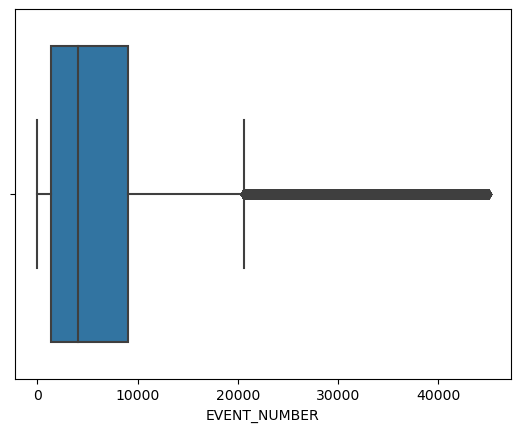

In [36]:
sns.boxplot(x=customer_df['EVENT_NUMBER'])

<Axes: xlabel='AMT'>

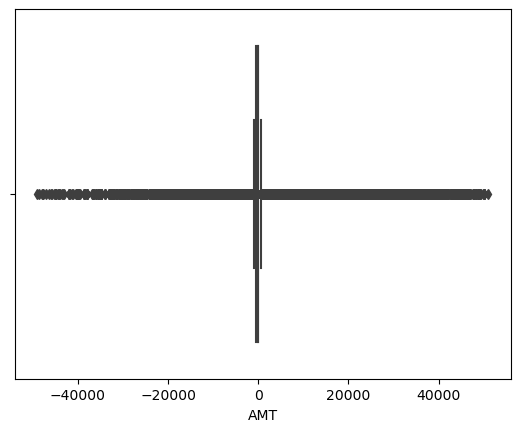

In [37]:
#distribution and outliers
sns.boxplot(x=customer_df['AMT']) 

## Checking for correlation between features

<Axes: >

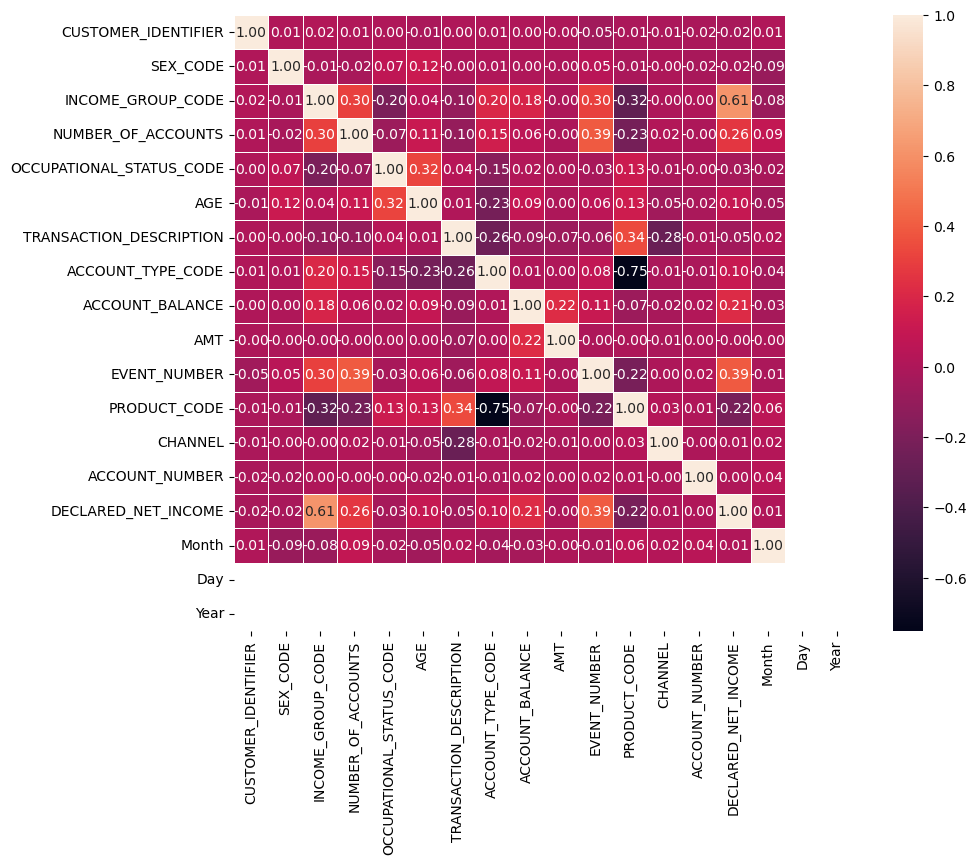

In [38]:
## Create a correlation matrix (if applicable) or any 2D data to be plotted as a heatmap
correlation_matrix = customer_df.corr()  # Replace 'data' with your DataFrame if you want to plot the correlation matrix

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as per your preference
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)

All columns show low correlation to the target.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'PRODUCT_CODE'),
  Text(1, 0, 'TRANSACTION_DESCRIPTION'),
  Text(2, 0, 'OCCUPATIONAL_STATUS_CODE'),
  Text(3, 0, 'CUSTOMER_IDENTIFIER'),
  Text(4, 0, 'SEX_CODE'),
  Text(5, 0, 'AMT'),
  Text(6, 0, 'ACCOUNT_NUMBER'),
  Text(7, 0, 'CHANNEL'),
  Text(8, 0, 'Month'),
  Text(9, 0, 'AGE'),
  Text(10, 0, 'ACCOUNT_TYPE_CODE'),
  Text(11, 0, 'ACCOUNT_BALANCE'),
  Text(12, 0, 'NUMBER_OF_ACCOUNTS'),
  Text(13, 0, 'EVENT_NUMBER'),
  Text(14, 0, 'INCOME_GROUP_CODE'),
  Text(15, 0, 'DECLARED_NET_INCOME'),
  Text(16, 0, 'Day'),
  Text(17, 0, 'Year')])

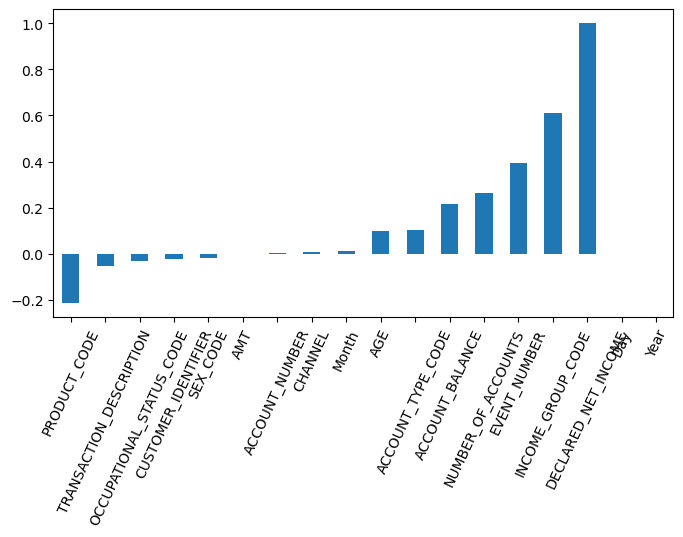

In [39]:
customer_df.corrwith(customer_df['DECLARED_NET_INCOME']).sort_values().plot(kind= 'bar', figsize=(8,4))
plt.xticks(rotation =65)

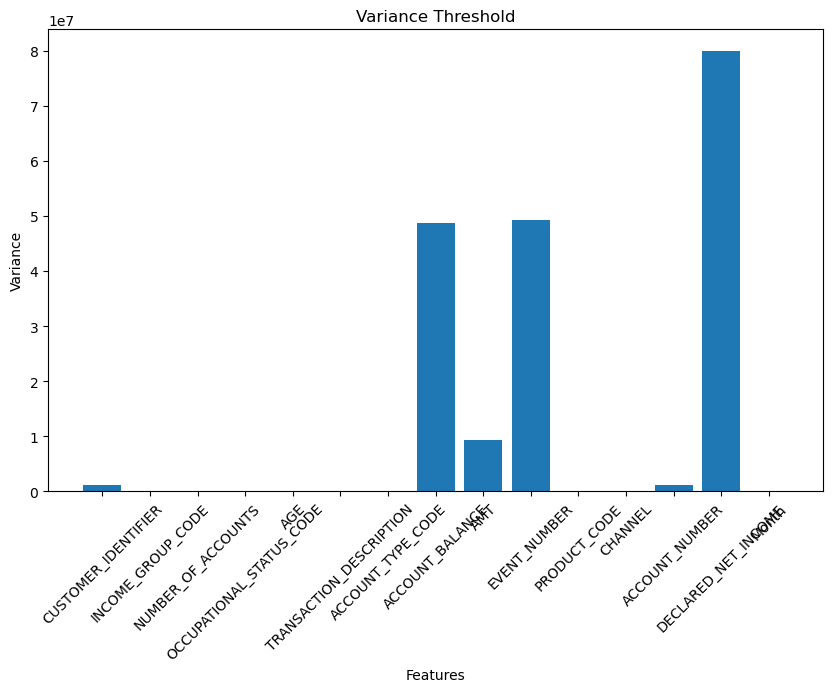

In [40]:
threshold = 0.25

#Apply variance threshold to remove low-variance features
variance_selector = VarianceThreshold(threshold=threshold)
df_filtered = variance_selector.fit_transform(customer_df)

#Get the feature indices after filtering
selected_feature_indices = np.where(variance_selector.variances_ > threshold)[0]

#Get the variances of the remaining features
selected_feature_variances = variance_selector.variances_[selected_feature_indices]

#Plot the variance of the features
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_feature_variances)), selected_feature_variances)
plt.xticks(range(len(selected_feature_variances)), customer_df.columns[selected_feature_indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Variance Threshold')
plt.show()

## Checking for kurtosis and skewness

In [41]:
customer_df.kurtosis()

CUSTOMER_IDENTIFIER         -1.213604
SEX_CODE                    -1.937574
INCOME_GROUP_CODE           -0.010722
NUMBER_OF_ACCOUNTS           1.419239
OCCUPATIONAL_STATUS_CODE    11.880563
AGE                          0.016202
TRANSACTION_DESCRIPTION      0.118409
ACCOUNT_TYPE_CODE           -0.688625
ACCOUNT_BALANCE              5.975787
AMT                         65.985243
EVENT_NUMBER                 4.448615
PRODUCT_CODE                -1.947942
CHANNEL                     -1.034626
ACCOUNT_NUMBER              -1.187339
DECLARED_NET_INCOME          6.402825
Month                       -0.649353
Day                          0.000000
Year                         0.000000
dtype: float64

In [42]:
customer_df.skew()

CUSTOMER_IDENTIFIER        -0.014402
SEX_CODE                    0.249866
INCOME_GROUP_CODE          -0.754552
NUMBER_OF_ACCOUNTS          0.907305
OCCUPATIONAL_STATUS_CODE    3.638964
AGE                         0.602186
TRANSACTION_DESCRIPTION    -1.177845
ACCOUNT_TYPE_CODE          -0.870878
ACCOUNT_BALANCE             2.245705
AMT                         4.931785
EVENT_NUMBER                1.928802
PRODUCT_CODE                0.228178
CHANNEL                     0.719963
ACCOUNT_NUMBER              0.018658
DECLARED_NET_INCOME         1.750024
Month                      -0.515726
Day                         0.000000
Year                        0.000000
dtype: float64

In [43]:
customer_df = customer_df.drop(['PRODUCT_CODE', 'AMT', 'SEX_CODE','INCOME_GROUP_CODE'],axis=1)
#customer_df = np.log(customer_df)

X = customer_df.drop(['DECLARED_NET_INCOME'], axis=1)
y = customer_df['DECLARED_NET_INCOME']

In [44]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [45]:

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [46]:
# scaler = Normalizer()
# X_scaled = scaler.fit_transform(X)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=49)

In [48]:
# import statsmodels.api as sm
# def backward_regression(X, y,
#                            initial_list=[], 
#                            threshold_in=0.01, 
#                            threshold_out = 0.05, 
#                            verbose=True):
#     included=list(X.columns)
#     while True:
#         changed=False
#         model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
#         # use all coefs except intercept
#         pvalues = model.pvalues.iloc[1:]
#         worst_pval = pvalues.max() # null if pvalues is empty
#         if worst_pval > threshold_out:
#             changed=True
#             worst_feature = pvalues.idxmax()
#             included.remove(worst_feature)
#             if verbose:
#                 print('Drop  with p-value '.format(worst_feature, worst_pval))
#         if not changed:
#             break
#     return included

# backward_regression(X_train, y_train)

# Linear Regression

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
print(r2_score(y_train, lr.predict(X_train)))
print(r2_score(y_test, lr.predict(X_test)))

0.20694138635819914
0.2102444016708669


In [51]:
#Make predictions on the test set
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

#Evaluate the model's performance
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

#Print the results
print("Mean Squared Error (MSE) on Test Set:", mse_test)
print("Mean Squared Error (MSE) on Train Set:", mse_train)

Mean Squared Error (MSE) on Test Set: 62924808.763353296
Mean Squared Error (MSE) on Train Set: 63367544.40783904


# Random Forest Regressor

In [52]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
print(r2_score(y_train, rfr.predict(X_train)))
print(r2_score(y_test, rfr.predict(X_test)))

0.9992813281337416
0.9953745878213086


In [54]:
#Make predictions on the test set
y_pred_rfr = rfr.predict(X_test)

#Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred_rfr)

#Print the results
print("Mean Squared Error (MSE) on Test Set:", mse)

Mean Squared Error (MSE) on Test Set: 368535.75639301265


## Decision Tree

In [72]:
dr = DecisionTreeRegressor()
dr.fit(X_train, y_train)

DecisionTreeRegressor()

In [73]:
print(r2_score(y_train, dr.predict(X_train)))
print(r2_score(y_test, dr.predict(X_test)))

1.0
0.9838565766488138


In [78]:
#Make predictions on the test set
y_pred_test = dr.predict(X_test)
y_pred_train = dr.predict(X_train)

#Evaluate the model's performance
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train,y_pred_train)

#Print the results
print("Mean Squared Error (MSE) on Test Set:", mse_test)
print("Mean Squared Error (MSE) on Train Set:", mse_train)

Mean Squared Error (MSE) on Test Set: 1286248.339750164
Mean Squared Error (MSE) on Train Set: 0.0


## KNeighbors Regressor

In [69]:

knn = KNeighborsRegressor(n_neighbors=5)

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test)

In [70]:
print(r2_score(y_train, knn.predict(X_train)))
print(r2_score(y_test, knn.predict(X_test)))

0.9758842245573329
0.9548159464641623


In [76]:
#Make predictions on the test set
y_pred_knn_test = knn.predict(X_test)
y_pred_knn_train = knn.predict(X_train)

#Evaluate the model's performance
mse_knn_test = mean_squared_error(y_test, y_pred_knn_test)
mse_knn_train = mean_squared_error(y_train,y_pred_knn_train)

#Print the results
print("Mean Squared Error (MSE) on Test Set:", mse_knn_test)
print("Mean Squared Error (MSE) on Train Set:", mse_knn_train)

Mean Squared Error (MSE) on Test Set: 3600098.4784545805
Mean Squared Error (MSE) on Train Set: 1926916.1761893453
